# Exploring the data set I was given

## Loading it all in

In [191]:
import os
import pandas as pd
import json

In [192]:
cat_path = 'cataglories.json'
vid_path = 'USvideos.csv'

In [193]:
# Read file sizes, seems like a lot of videos
MB = os.stat(vid_path).st_size / 1000 / 1000
print('Data ' + str(MB) + 'mb')

Data 62.756152mb


In [194]:
# Its not really that much, so load it all into memory
raw_videoData = pd.read_csv( vid_path )
with open(cat_path) as f:
  data = json.load(f)
raw_jsonData = pd.DataFrame([ {'label': item['snippet']['title'], 'id' : item['id']}  for (i,item) in enumerate(list(data['items'])) ])
raw_jsonData['id'] = raw_jsonData['id'].astype(int)

In [195]:
# replace category ID with actual name
combined_data = raw_videoData.merge(raw_jsonData, left_on='category_id', right_on='id')
combined_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,id,label
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,22,People & Blogs
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,22,People & Blogs
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,22,People & Blogs
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,22,People & Blogs
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,22,People & Blogs


In [196]:
# lots of un-needed columns, lets drop what i dont want for now and leave what sounds interesting
dataset = combined_data.reindex(columns=['trending_date', 'title', 'channel_title', 'publish_time','tags','views','likes','dislikes','comment_count','description','label'])
dataset.head()

,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,description,label
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,17.14.11,Me-O Cats Commercial,Nobrand,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,Kittens come out of the eggs in a Thai commerc...,People & Blogs
2,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs
3,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,Molly is an god damn amazing human and she cha...,People & Blogs
4,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,I found this online dollar store called ShopMi...,People & Blogs


## Exploring publication vs days untill trending date

In [197]:
import matplotlib.pyplot as plot

In [198]:
# How long before each video trends on average
trending_time = pd.to_datetime('20' + dataset['trending_date'], format="%Y.%d.%m").dt.tz_localize('UTC')
publish_time = pd.to_datetime(dataset['publish_time'])
delta_time = trending_time - publish_time
trendings =  pd.DataFrame({'time': delta_time, 'days': delta_time / pd.to_timedelta(1, unit='D'), 'cat' : dataset['label']})
trendings.head()

,time,days,cat
0,0 days 06:46:59,0.282627,People & Blogs
1,206 days 17:12:28,206.716991,People & Blogs
2,2 days 08:59:57,2.374965,People & Blogs
3,2 days 05:51:56,2.244398,People & Blogs
4,2 days 22:40:27,2.944757,People & Blogs


In [199]:
# Lets look at some stats from these values
print( 'Average time till trending: ', trendings['time'].mean())
print( 'Median time till trending: ', trendings['time'].median())
print('Lots of videos trend within a week, but a few long-term trenders pull up the average')

Average time till trending:  16 days 05:21:53.236220
Median time till trending:  4 days 18:59:55
Lots of videos trend within a week, but a few long-term trenders pull up the average


(array([3.9645e+04, 8.4800e+02, 3.0000e+01, 1.2000e+01, 3.0000e+00,
        1.1000e+01, 7.0000e+00, 7.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <a list of 10 Patch objects>)

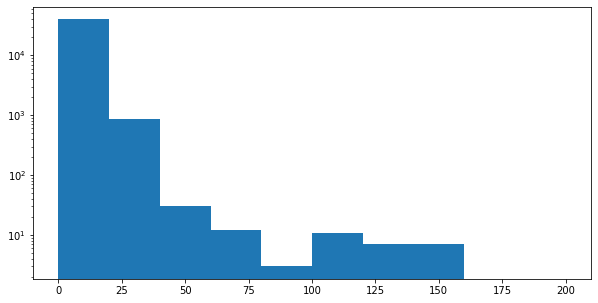

In [200]:
# Chart these numbers, log scale was more useful as it shows the range
plot.figure(figsize=(10,5))
plot.hist( trendings['days'].tolist(), range=(0,200), log=True )

(array([10481., 10588.,  8841.,  3536.,  2995.,  1625.,  1108.,   471.,
          372.,   224.]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <a list of 10 Patch objects>)

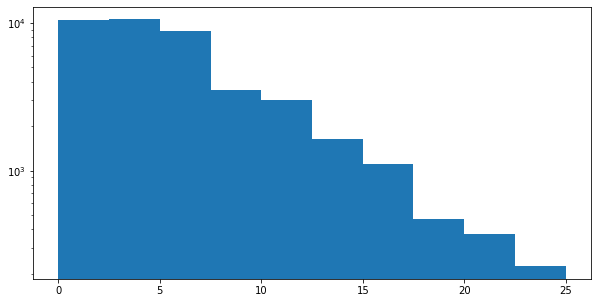

In [201]:
# Zooming into the first 25 days shows a straight logarthmic relationship
plot.figure(figsize=(10,5))
plot.hist( trendings['days'].tolist(), range=(0,25), log=True )

Notes on charts
- Trending happens sooner than later in vast majority of cases
- However, older videos get a bump? Why is that

In [213]:
# Looking into trending by cataglory
def chartAll (range) :
    all_cats = trendings['cat'].unique()
    fig, axs = plot.subplots(4,5,figsize=(20,20))
    for (i,cat) in enumerate(all_cats):
        x = i // 5
        y = i % 5
        data = trendings['days'][ trendings['cat'] == cat ]
        axs[x,y].hist(data.tolist(), range=(0,range), log=True)
        axs[x,y].set_title(cat)

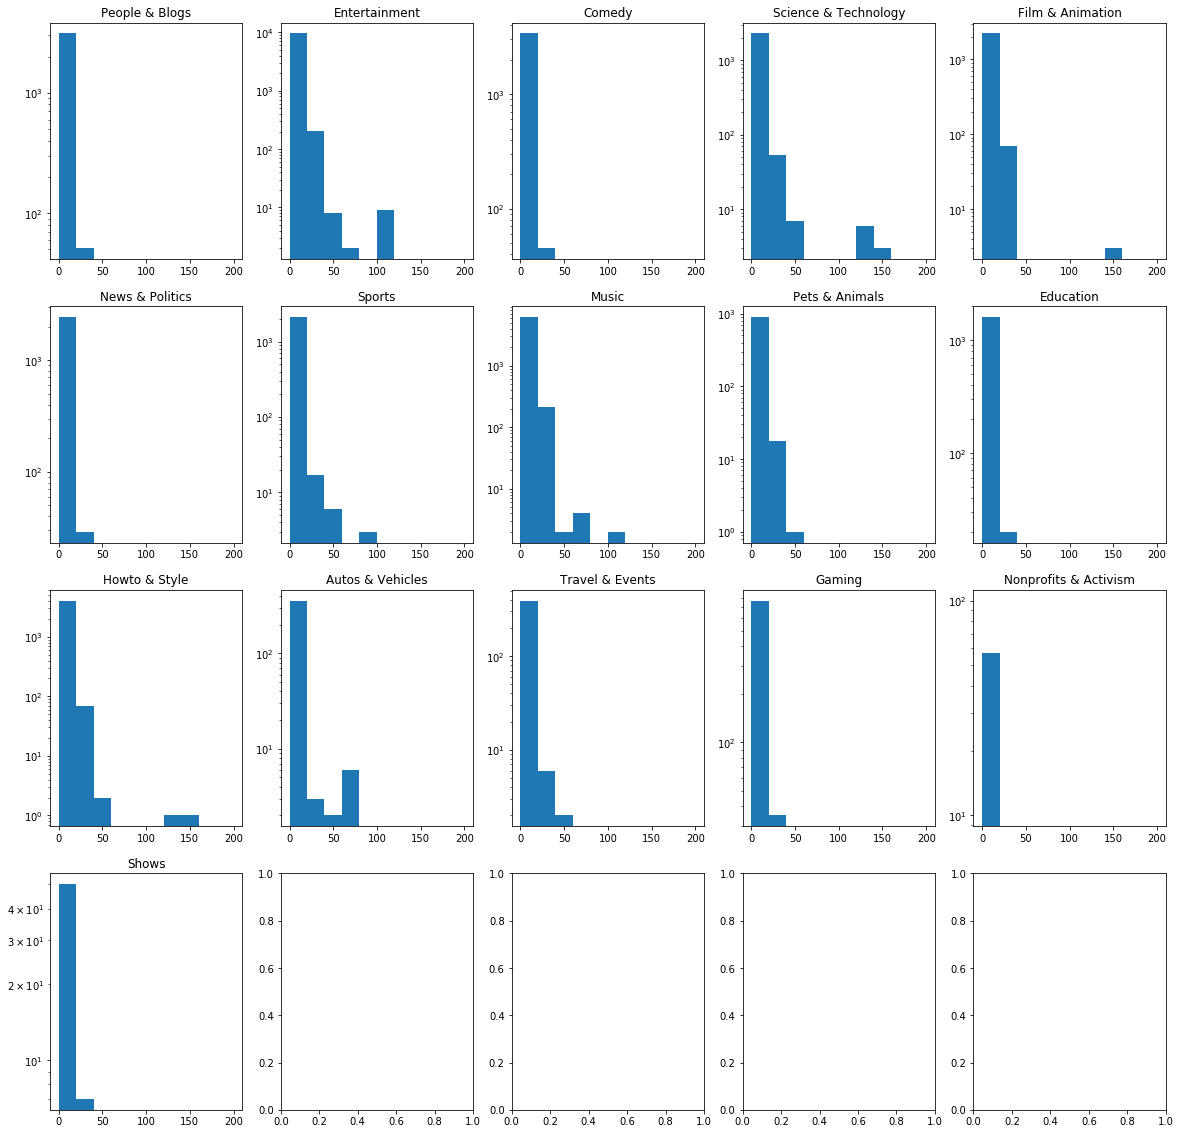

In [214]:
# Looking overall
chartAll( 200 )

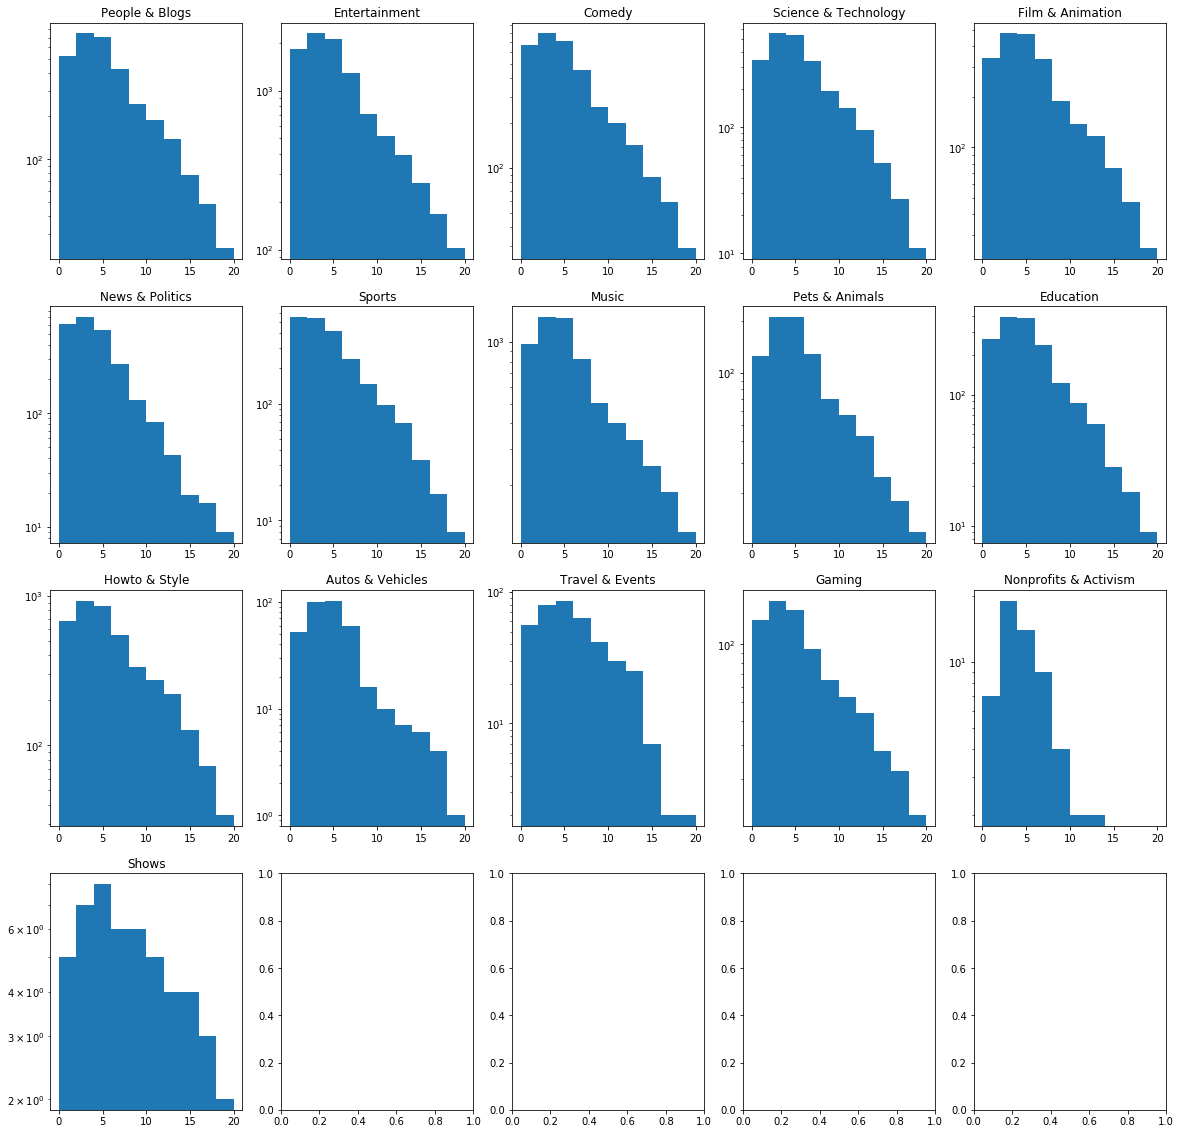

In [215]:
# Looking close 
chartAll ( 20 )

Notes on further charts
- With the exception of Nonprofits & Shows which seems to take a little bit of time to catch on, most cataglories trend quickly at the same rate
- But The cataglory makes a massive difference when it comes to how long a video is elegeble to trend for

## Exploring by chanel breakdowns

In [216]:
# What chanel does it the best?
trending_by_channel = pd.DataFrame( dataset['channel_title'].value_counts() )
trending_by_channel = pd.DataFrame({ 'channel' : trending_by_channel.index, 'count' : trending_by_channel['channel_title']}).reset_index(drop=True)
trending_by_channel.head()

,channel,count
0,ESPN,203
1,The Tonight Show Starring Jimmy Fallon,197
2,Netflix,193
3,Vox,193
4,TheEllenShow,193


In [217]:
# What about total metrics by chanel?
channel_total_metrics = dataset.groupby('channel_title').sum()

In [218]:
# Total of varius metrics by chanel and trending count
trending_by_channel = trending_by_channel.merge(channel_total_metrics, left_on='channel', right_on='channel_title')
trending_by_channel.head()

,channel,count,views,likes,dislikes,comment_count
0,ESPN,203,105654218,937723,108043,387753
1,The Tonight Show Starring Jimmy Fallon,197,271426383,5981334,187407,403655
2,Netflix,193,185818315,4211072,196212,391350
3,Vox,193,122633963,3272518,615977,558845
4,TheEllenShow,193,253841999,6035132,193602,344469


In [219]:
# add in content type
cataglories = pd.DataFrame(dataset.groupby('channel_title')['label'].first())
trending_by_channel = trending_by_channel.merge(cataglories, left_on='channel', right_on='channel_title')
trending_by_channel.head()

,channel,count,views,likes,dislikes,comment_count,label
0,ESPN,203,105654218,937723,108043,387753,Sports
1,The Tonight Show Starring Jimmy Fallon,197,271426383,5981334,187407,403655,Comedy
2,Netflix,193,185818315,4211072,196212,391350,Entertainment
3,Vox,193,122633963,3272518,615977,558845,News & Politics
4,TheEllenShow,193,253841999,6035132,193602,344469,Entertainment


In [221]:
# Now lets look at how some of these chanels stack up!
chanels_by_views = trending_by_channel.sort_values(by='views', ascending=False)
chanels_by_views[:20]
# By views music chanels dominate, but that makes sense.
# With such high views they dont seem to trend that often though.

,channel,count,views,likes,dislikes,comment_count,label
420,ChildishGambinoVEVO,25,3758488765,96700818,6054434,10151289,Music
97,ibighit,80,2235906679,199247121,3467306,31817464,Music
36,Dude Perfect,131,1870085178,60275557,1501477,4009163,Sports
39,Marvel Entertainment,125,1808998971,55873344,1031250,6453560,Entertainment
252,ArianaGrandeVevo,43,1576959172,52170970,1931230,4295333,Music
344,MalumaVEVO,32,1551515831,23278380,1757948,1227634,Music
140,jypentertainment,64,1486972132,44900910,2482131,7575510,Music
83,Sony Pictures Entertainment,88,1432374398,30106808,1414686,3533551,Entertainment
349,FoxStarHindi,32,1238609854,23762509,910745,1782776,Entertainment
507,BeckyGVEVO,20,1182971286,19185287,1616616,1176862,Music


In [225]:
# What about by engagement? Likes?
chanels_by_likes = trending_by_channel.sort_values(by='likes', ascending=False)
chanels_by_likes[:20]
# Again its music, makes sense again

,channel,count,views,likes,dislikes,comment_count,label
97,ibighit,80,2235906679,199247121,3467306,31817464,Music
420,ChildishGambinoVEVO,25,3758488765,96700818,6054434,10151289,Music
36,Dude Perfect,131,1870085178,60275557,1501477,4009163,Sports
39,Marvel Entertainment,125,1808998971,55873344,1031250,6453560,Entertainment
252,ArianaGrandeVevo,43,1576959172,52170970,1931230,4295333,Music
140,jypentertainment,64,1486972132,44900910,2482131,7575510,Music
207,TaylorSwiftVEVO,49,1010955662,39292840,2127542,3352611,Music
221,Ed Sheeran,47,1032288961,39279211,769501,1950501,Music
285,ZaynVEVO,39,838561451,31695245,777336,2144996,Music
438,Logan Paul Vlogs,24,484356303,31545290,13847251,14870370,Entertainment


In [226]:
# What about by engagement? Likes?
chanels_by_comments = trending_by_channel.sort_values(by='comment_count', ascending=False)
chanels_by_comments[:20]
# Damn you music! Lets just get rid of them, seems to be an outlier group

,channel,count,views,likes,dislikes,comment_count,label
97,ibighit,80,2235906679,199247121,3467306,31817464,Music
438,Logan Paul Vlogs,24,484356303,31545290,13847251,14870370,Entertainment
420,ChildishGambinoVEVO,25,3758488765,96700818,6054434,10151289,Music
140,jypentertainment,64,1486972132,44900910,2482131,7575510,Music
572,YouTube Spotlight,18,791388476,20173324,10924092,6495154,Entertainment
39,Marvel Entertainment,125,1808998971,55873344,1031250,6453560,Entertainment
32,Safiya Nygaard,139,528434394,25344263,350015,4419873,People & Blogs
252,ArianaGrandeVevo,43,1576959172,52170970,1931230,4295333,Music
263,Call of Duty,41,315404711,11553594,5644083,4224430,Gaming
26,jacksfilms,148,199608855,13991372,402276,4074130,Comedy


In [229]:
trending_by_channel_musicless = trending_by_channel[ trending_by_channel['label'] != 'Music' ]
trending_by_channel_musicless[:20]
# Removing music, you see a lot of corperate shows, wow
# Late night is trending a lot
# ESPN, VOX, WIRED, CNN
# Big media stuff

,channel,count,views,likes,dislikes,comment_count,label
0,ESPN,203,105654218,937723,108043,387753,Sports
1,The Tonight Show Starring Jimmy Fallon,197,271426383,5981334,187407,403655,Comedy
2,Netflix,193,185818315,4211072,196212,391350,Entertainment
3,Vox,193,122633963,3272518,615977,558845,News & Politics
4,TheEllenShow,193,253841999,6035132,193602,344469,Entertainment
5,The Late Show with Stephen Colbert,187,123675646,1511686,172466,217376,People & Blogs
6,Jimmy Kimmel Live,186,285418753,4844377,389653,514641,Entertainment
7,Late Night with Seth Meyers,183,181602246,2098813,145073,259698,Comedy
8,Screen Junkies,182,319075554,8836325,336492,1130838,Film & Animation
9,NBA,181,72404568,878898,83248,100271,Sports


In [231]:
trending_by_channel_musicless.sort_values(by='views', ascending=False)[:20]
# Wow, and the chanels that get tons of views dont trend that much in comparison. Interesting

,channel,count,views,likes,dislikes,comment_count,label
36,Dude Perfect,131,1870085178,60275557,1501477,4009163,Sports
39,Marvel Entertainment,125,1808998971,55873344,1031250,6453560,Entertainment
83,Sony Pictures Entertainment,88,1432374398,30106808,1414686,3533551,Entertainment
349,FoxStarHindi,32,1238609854,23762509,910745,1782776,Entertainment
33,20th Century Fox,135,1082872611,24419452,488761,1509224,Film & Animation
366,Cardi B,30,1026247756,26724811,1431459,1692916,People & Blogs
55,Universal Pictures,106,883707419,12481737,529442,1351963,Entertainment
271,Disney•Pixar,40,826815182,13623208,449099,1410747,Film & Animation
381,Selena Gomez,28,818792483,20165850,346079,1002366,Film & Animation
572,YouTube Spotlight,18,791388476,20173324,10924092,6495154,Entertainment


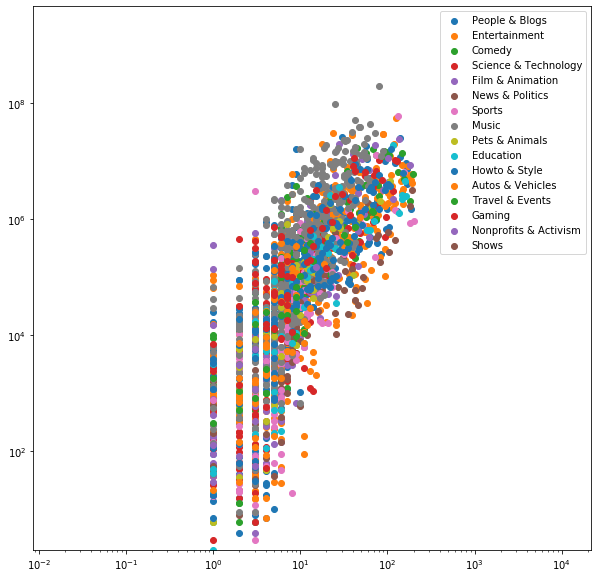

In [264]:
# Lets chart this all out to see what trends more or less 
# This chart sucks btw haha 
def plotCataglory  top_50 = trending_by_channel[:50]
fig, axs = plot.subplots(figsize=(10,10))
axs.set_yscale('log')
axs.set_xscale('log')
all_cats = trendings['cat'].unique()
for (i,cat) in enumerate(all_cats):
    cat_representation = trending_by_channel[trending_by_channel.label == cat]
    plot.scatter(cat_representation['count'], cat_representation['likes'], label=cat)
plot.legend()

In [320]:
import numpy as np
import matplotlib.lines as mlines



In [321]:
def newline(a, p1, p2):
    xmin, xmax = a.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax])
    a.add_line(l)
    return l    

In [339]:
def chartAll () :
    lines = []
    all_cats = trendings['cat'].unique()
    fig, axs = plot.subplots(4,5,figsize=(20,20))
    for (i,cat) in enumerate(all_cats):
        
        # Get Data
        cat_representation = trending_by_channel[:500][trending_by_channel.label == cat]
        cat_representation = cat_representation[cat_representation['count'] < 200 ]
        cat_representation = cat_representation[cat_representation['likes'] < 10000000 ]
        xData = cat_representation['count']
        yData = cat_representation['likes']
        
        if len(cat_representation) is 0: continue
        
        # Scale Chart
        x = i // 5
        y = i % 5
        axs[x,y].set_xlim((0,200))
        axs[x,y].set_ylim((0,10000000))
        
        # Chart
        axs[x,y].scatter(xData, yData, label=cat)
        axs[x,y].set_title(cat)

        # Get Trend Line
        z = np.polyfit(x=np.array(xData.values), y=np.array(yData.values), deg=1)
        lines.append((cat,z[0]))
        
        newline(axs[x,y],(0,z[1]),(1,z[1] + z[0]))
        
    return lines

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RankWarning: Polyfit may be poorly conditioned


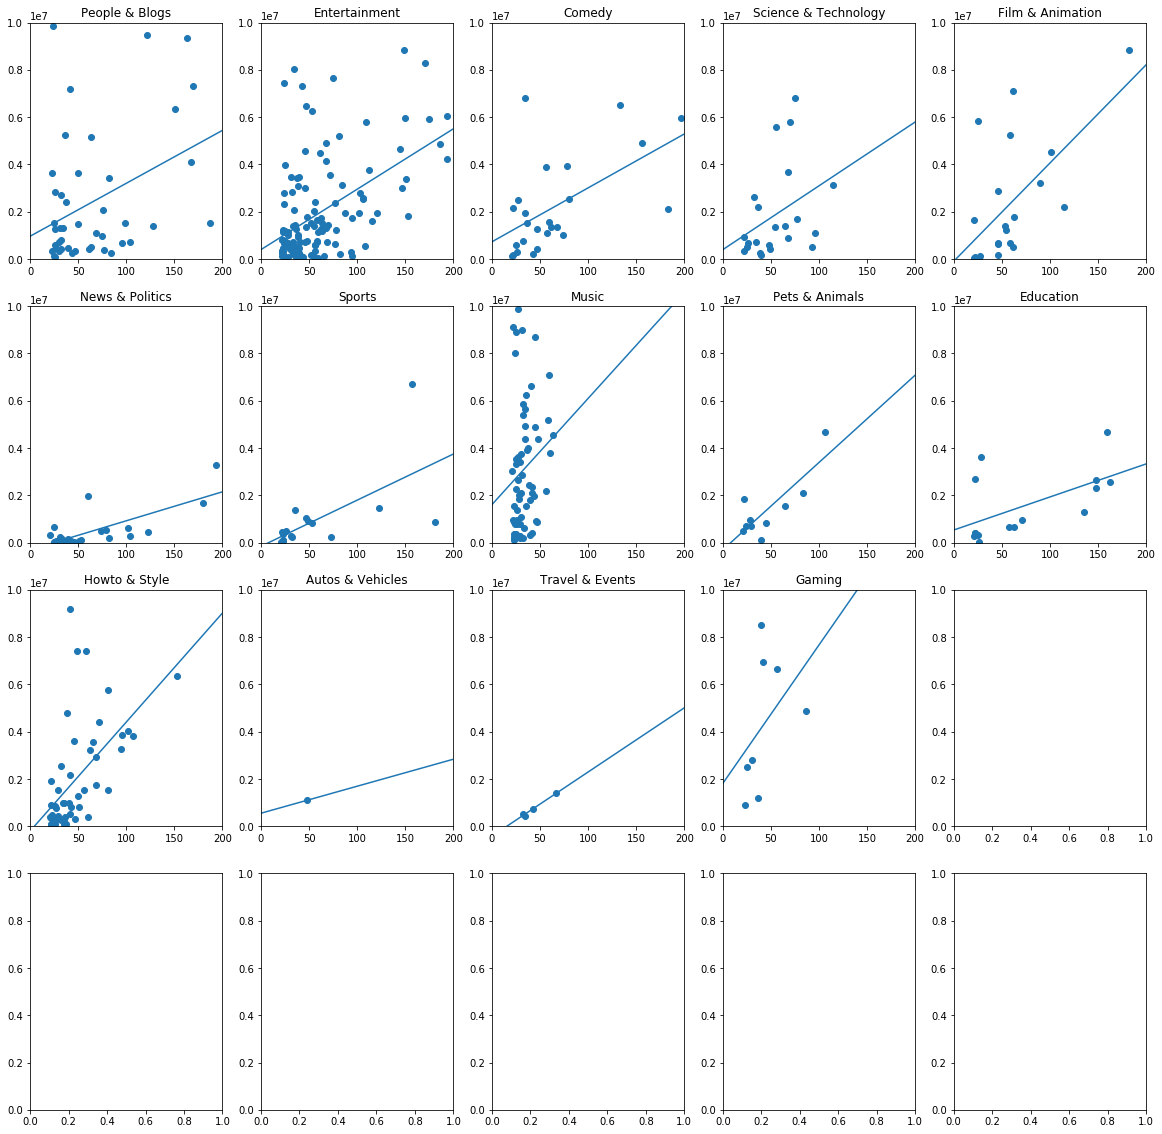

In [340]:
# X axis denotes number of times trending
# Y Axis is number of views on trending videos
slopeLines = chartAll()

Particular importance of Education & News and politics
- These two cataglories are highly moved right relative to other cataglories
- It it much easier to trend in these cataglories than others it seems
- Some of these slops are not perfect, Music is ceratinly wrong, should use a methon that minimizes distance not height to line

In [344]:
# Line slopes generated for data
slopeLines

[('People & Blogs', 22405.30725244264),
 ('Entertainment', 25559.61725749245),
 ('Comedy', 22819.115517921164),
 ('Science & Technology', 27010.445122485333),
 ('Film & Animation', 41565.14214501562),
 ('News & Politics', 12270.516339244816),
 ('Sports', 19525.213522193957),
 ('Music', 44937.291298734366),
 ('Pets & Animals', 36968.19644837616),
 ('Education', 13984.134917312125),
 ('Howto & Style', 46148.17901087852),
 ('Autos & Vehicles', 11426.218749999995),
 ('Travel & Events', 27160.537467700276),
 ('Gaming', 58590.44658119666)]

In [355]:
# Lets rank trending chance basted on this slope!
# Average out lines
catSlopes = pd.DataFrame ( slopeLines )
catSlopes['trendSlope'] = catSlopes[1] / catSlopes[1].max()

# This ranks the strenght of trending of the cataglories
# Higher is much less likely to trend, needs more views to get onto trending
catSlopes.sort_values(by='trendSlope', ascending=False)

,0,1,trendSlope
13,Gaming,58590.446581,1.000000
10,Howto & Style,46148.179011,0.787640
7,Music,44937.291299,0.766973
4,Film & Animation,41565.142145,0.709418
8,Pets & Animals,36968.196448,0.630959
12,Travel & Events,27160.537468,0.463566
3,Science & Technology,27010.445122,0.461004
1,Entertainment,25559.617257,0.436242
2,Comedy,22819.115518,0.389468
0,People & Blogs,22405.307252,0.382405


In [356]:
# Inverted it so higher is more likely to trend, relative strength ish
catSlopes['trendingStrength'] = 1 / ( catSlopes[1] / catSlopes[1].max())
catSlopes.sort_values(by='trendingStrength', ascending=False)

,0,1,trendSlope,trendingStrength
11,Autos & Vehicles,11426.218750,0.195018,5.127720
5,News & Politics,12270.516339,0.209429,4.774897
9,Education,13984.134917,0.238676,4.189780
6,Sports,19525.213522,0.333249,3.000758
0,People & Blogs,22405.307252,0.382405,2.615025
2,Comedy,22819.115518,0.389468,2.567604
1,Entertainment,25559.617257,0.436242,2.292305
3,Science & Technology,27010.445122,0.461004,2.169177
12,Travel & Events,27160.537468,0.463566,2.157190
8,Pets & Animals,36968.196448,0.630959,1.584888


## Conclusion
So it seems like News & Politics / Education / Auto & Vehicles are the key to trending on youtube

Looking at the line and scatter charts above, gaming and music get so many views! but they rairly trend.

On the other hand, News gets hardly any views, but trends all the time.

Late night shows are particularly for topping a lot of the trending charts but none of the view charts